In [ ]:
# 06_pca_tsne (n)
# 1. Dla danych z zadania z 05 wykonaj:
# PCA dla n_components = [2 ,4, 6] i wyświetl wartość explained_variance_ratio_
# utwórz wykres typu "słupkowego" dla wszystkich n_components_
# oblicz n_components_, które zachowają wariancję na poziomie 95%
# 2. Dla datasetu z projektu:
# utwórz scatter plot, korzystając z:
# t-SNE*
# PCA + t-SNE (skorzystaj z Pipeline lub make_pipeline)
# porównaj czas oraz "jakość" powyższych wykresów
# 3. Zaimplementuj GridsearchCV oraz kPCA dla danych z pkt. 2:
# znajdź najlepszy kernel oraz parametr gamma (zacznij od np.linespace(0.03, 0.05, 5))
# wybierz dowolny klasyfikator

# * Jeżeli czas utworzenia wykresu z wykorzystaniem t-SNE jest za długi,  zmniejsz dataset (wybierz losowe obserwacje)

# Rozwiązanie prześlij jako printscreen (jpg, pdf).
# Nazwa pliku (bez polskich znaków):

# Nazwisko_Imie_06_niestacj.jpg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [3]:
X, y = wine.data, wine.target

In [4]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [5]:
n_comp = [2, 4, 6]
n_comp_sum = []

In [6]:
seed = np.random.seed(102)

In [7]:
for comp in n_comp:
    pca = PCA(n_components=comp, random_state=seed)
    pca.fit(X_scaled)
    
    expl_var_ratio = pca.explained_variance_ratio_
    print(expl_var_ratio)
    
    expl_var_ratio_sum = sum(expl_var_ratio)
    n_comp_sum.append(expl_var_ratio_sum)

[0.36198848 0.1920749 ]
[0.36198848 0.1920749  0.11123631 0.0706903 ]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823]


In [8]:
n_comp_sum

[0.554063383569353, 0.735989990758993, 0.8509811607477046]

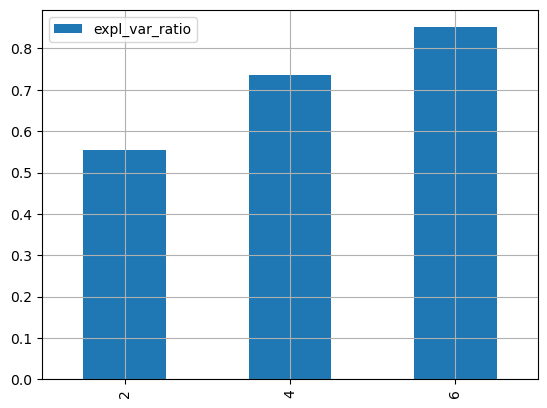

In [9]:
bar_plot = pd.DataFrame(n_comp_sum, index=n_comp, columns=["expl_var_ratio"])
bar_plot.plot(kind="bar", grid=True)
plt.show()

In [11]:
pca = PCA(n_components=0.95, random_state=seed)
x_reduced = pca.fit_transform(X)

pca.n_components_

1